# Data processiong, preparing learning to recognise Digits

In [1]:
#Importing libraries
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,MaxPooling2D,Activation,Dropout,Flatten,BatchNormalization,MaxPool1D
from tensorflow.keras.optimizers import SGD,Adam
import numpy as np

In [2]:
#load train set
train_set = pd.read_csv('train.csv')
train_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#load test set
test_set = pd.read_csv('test.csv')
test_set.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#count of train set
train_set['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [5]:
#create function to check for missing values in the train set

def f0_null(train_set):
    count=train_set.isnull().sum().sum()
    return count

In [6]:
# print missing value count in train set
count_null = f0_null(train_set)
print(count_null)  #no missing value in train set.

0


In [7]:
#create function to check duplicate values in train set
def f1_duplicates(train_set):
    count=train_set.duplicated().sum().sum()
    return count

In [8]:
# print duplicate values in train set
count_duplicates = f1_duplicates(train_set)
print(count_null)  #no duplicate value in train set.

0


In [9]:
#print shape of train and test set
print(train_set.shape)
print(test_set.shape)

(42000, 785)
(28000, 784)


In [10]:
#create function to view column names in train set

def check_column_names(train_set):
    column_names = train_set.columns
    return column_names

In [11]:
#print column names
names = check_column_names(train_set)
print("column_names",names)

column_names Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [12]:
#create function to view column names in test set

def check_column_names(test_set):
    test_column_names = test_set.columns
    return test_column_names

In [13]:
#print column names
test_names = check_column_names(test_set)
print("test_column_names",test_names)

test_column_names Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


In [14]:
#creat function to count each label of the train set
def find_count_plot(train_set):
    sns.countplot(train_set.label)

C:\Users\Dayo Tosin Oyeyemi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


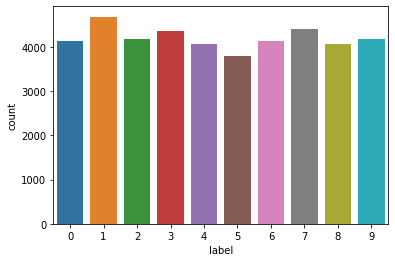

In [15]:
find_count_plot(train_set)

In [16]:
# Evaluate pixels range

train_set['pixel100'].value_counts()

0      38438
253      291
254      243
255      226
252       93
       ...  
169        3
151        3
124        3
55         2
83         2
Name: pixel100, Length: 256, dtype: int64

In [17]:
train_set['pixel5'].value_counts()

0    42000
Name: pixel5, dtype: int64

In [18]:
# Feature Normalization
y = train_set['label']
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [19]:
print(type(y))

<class 'pandas.core.series.Series'>


In [20]:
#Converts a class vector (integers) to binary class matrix.
y_train = tf.keras.utils.to_categorical(y, num_classes = 10)

In [21]:
X= train_set.drop(labels=['label'],axis=1)

In [22]:
#print first 10 rows
X.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Create function to Normalize the pixels values
def normalize(set):
    set = set/255.0
    return set

In [24]:
X = normalize(X)
print(X.shape)

(42000, 784)


In [25]:
X['pixel100'].value_counts()

0.000000    38438
0.992157      291
0.996078      243
1.000000      226
0.988235       93
            ...  
0.662745        3
0.592157        3
0.486275        3
0.215686        2
0.325490        2
Name: pixel100, Length: 256, dtype: int64

In [26]:
# Create function to reshape train set image
X_train = X

In [27]:
def reshape(X_train):
    X_train = X_train.values.reshape(-1,28,28,1)
    return X_train

In [28]:
X_train = reshape(X_train)

In [29]:
test_set = reshape(test_set)

In [30]:
#Print new shape
print(X_train.shape)
print(test_set.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [31]:
#Image has (28**28) pixels has been stock into Pandas. 
#DataFrame as 1D Vectors of 784 values. 
#reshape all data that indicates(height,width,channel).Channel 3 means RGB.

test_set = normalize(test_set)
print(test_set.shape)

(28000, 28, 28, 1)


In [32]:
#Create function to Preview image

def Preview_image(X,idx):
    plt.figure(figsize=(7,7))
    grid_set = X.iloc[idx].to_numpy().reshape(28,28)
    plt.imshow(grid_set,interpolation=None,cmap='afmhot')
    plt.show()

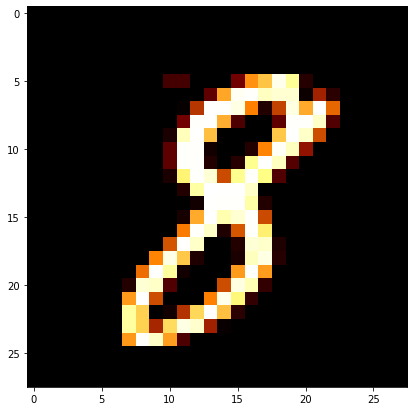

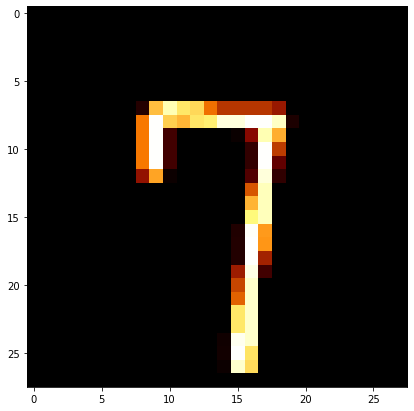

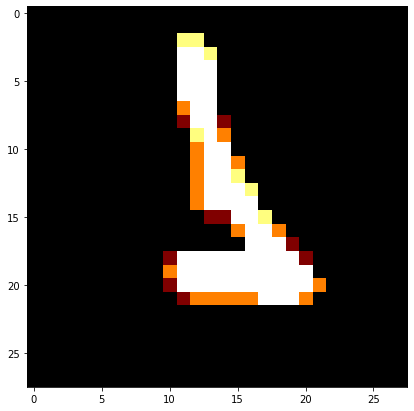

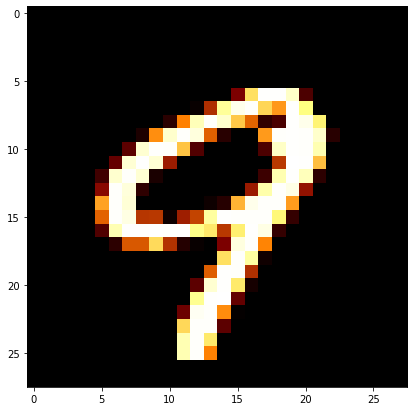

[None, None, None, None]


In [33]:
a0=Preview_image(X,20)
a2=Preview_image(X,50)
a3=Preview_image(X,60)
a4=Preview_image(X,100)

#create list
P0=[a0,
    a2,
    a3,
    a4]

#print list
print(P0)

In [34]:
#Splitting train test image set

In [35]:
x_train,x_val,y_train,y_val = train_test_split(X_train,
                                               y_train,
                                               stratify=y_train,
                                               test_size=0.1,
                                               random_state=42)

b1=x_train.shape
b2=x_val.shape
b3=y_train.shape
b4=y_val.shape

#create list
l=[b1,b2,b3,b4]

#print list
print(l)

[(37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10)]


# convolutional neural network technique

In [36]:
#create model
#using activation function relu and softmax
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=64,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [37]:
#print model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        102464    
                                                        

In [38]:
# set optimizer to RMSprop
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,
                                      rho=0.9,
                                      momentum=0.1)

In [39]:
#Compile model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
print(y_train.shape)

(37800, 10)


In [41]:
#fit model
history =model.fit(x_train,
          y_train,
          epochs=10,
          batch_size=100,
          validation_data=(x_val,y_val))

Epoch 1/10
378/378 [==============================] - 308s 811ms/step - loss: 0.2350 - accuracy: 0.9249 - val_loss: 0.0409 - val_accuracy: 0.9876
Epoch 2/10
378/378 [==============================] - 287s 760ms/step - loss: 0.0548 - accuracy: 0.9837 - val_loss: 0.0440 - val_accuracy: 0.9871
Epoch 3/10
378/378 [==============================] - 290s 767ms/step - loss: 0.0394 - accuracy: 0.9884 - val_loss: 0.0346 - val_accuracy: 0.9919
Epoch 4/10
378/378 [==============================] - 290s 767ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0334 - val_accuracy: 0.9919
Epoch 5/10
378/378 [==============================] - 344s 910ms/step - loss: 0.0253 - accuracy: 0.9926 - val_loss: 0.0321 - val_accuracy: 0.9917
Epoch 6/10
378/378 [==============================] - 326s 863ms/step - loss: 0.0224 - accuracy: 0.9932 - val_loss: 0.0354 - val_accuracy: 0.9924
Epoch 7/10
378/378 [==============================] - 320s 848ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0349 -

In [42]:
#defining acc, val_acc, loss, val_loss, epochs and epochs_range
epochs=10
epochs_range = range(epochs)
acc = history.history['accuracy']
val_acc = history.history['val_loss']

loss= history.history['loss']
val_loss = history.history['val_loss']

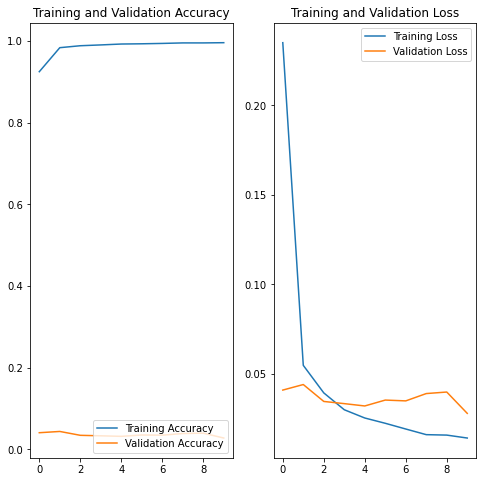

In [43]:
#plot of learning process using accuracy, validation accuracy, loss and validation loss information from model training

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, 
         acc, 
         label='Training Accuracy')

plt.plot(epochs_range,
         val_acc, 
         label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range,
         loss, 
         label='Training Loss')

plt.plot(epochs_range,
         val_loss,
         label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
#evaluate the model
scores = model.evaluate(x_train, y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.91%


In [45]:
# serialize model to JSON
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

#The model is then converted to JSON format and written to model.json in the local directory. 
#The network weights are written to model.h5 in the local directory.

Saved model to disk


In [46]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
#The model and weight data is loaded from the saved files, and a new model is created

Loaded model from disk


In [47]:
#evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', 
                     optimizer=optimizer, 
                     metrics=['accuracy'])

score = loaded_model.evaluate(x_train, y_train, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

#compile the loaded model before it is used. This is so that predictions made using the model can use the appropriate efficient computation from the Keras backend.

accuracy: 99.91%


<AxesSubplot:>

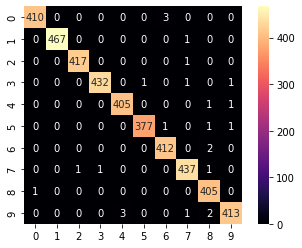

In [48]:
#confusion matrix
from sklearn.metrics import confusion_matrix

#predict the values from validation data set
y_pred = model.predict(x_val)
#convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis=1)
#convert validation observation to one hot vector
y_true = np.argmax(y_val,axis=1)
#calculate the confusion matrix
conf_mat=confusion_matrix(y_true,y_pred_classes)
sns.heatmap(conf_mat, square=True, annot=True, cmap='magma', fmt='d', cbar=True)

In [49]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       413
           1       1.00      1.00      1.00       468
           2       1.00      1.00      1.00       418
           3       1.00      0.99      1.00       435
           4       0.99      1.00      0.99       407
           5       1.00      0.99      0.99       380
           6       0.99      1.00      0.99       414
           7       0.99      0.99      0.99       440
           8       0.98      1.00      0.99       406
           9       0.99      0.99      0.99       419

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



In [50]:
#Predicting output with the test data
y_predict = model.predict(test_set)
#select the index with maximum probability
results = np.argmax(y_predict,axis=1)

In [51]:
print(results)

[2 0 9 ... 3 9 2]


In [52]:
#load sample_submission csv
df = pd.read_csv("sample_submission.csv")
df.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [53]:
#Predictions
y_predict = pd.DataFrame({"ImageId":df["ImageId"],"Label":results})
y_predict.to_csv('MNISTDigitRecognizer.csv', index=False)
y_predict.head(6)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
